In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import math

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# 1. 데이터 수집
빅콘테스트 제공 파일

In [ ]:
df0 = pd.read_csv('/content/drive/MyDrive/21 세미프로젝트_2차/원본데이터/01_제공데이터_update(210811)/02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.CSV', encoding='cp949')
df0

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주
...,...,...,...,...,...,...,...,...,...,...
23837312,2021-06-30,24,THA,서귀포시,50130620,예래동,0.0000,0.0000,3.3558,제주
23837313,2021-06-30,24,TWN,서귀포시,50130620,예래동,0.0000,0.0000,12.2655,그외
23837314,2021-06-30,24,USA,서귀포시,50130620,예래동,22.0624,0.0000,0.0000,제주
23837315,2021-06-30,24,USA,서귀포시,50130620,예래동,0.0000,0.0000,26.4749,그외


# 2. 데이터 분포 확인

## 1) resd_pop_cnt

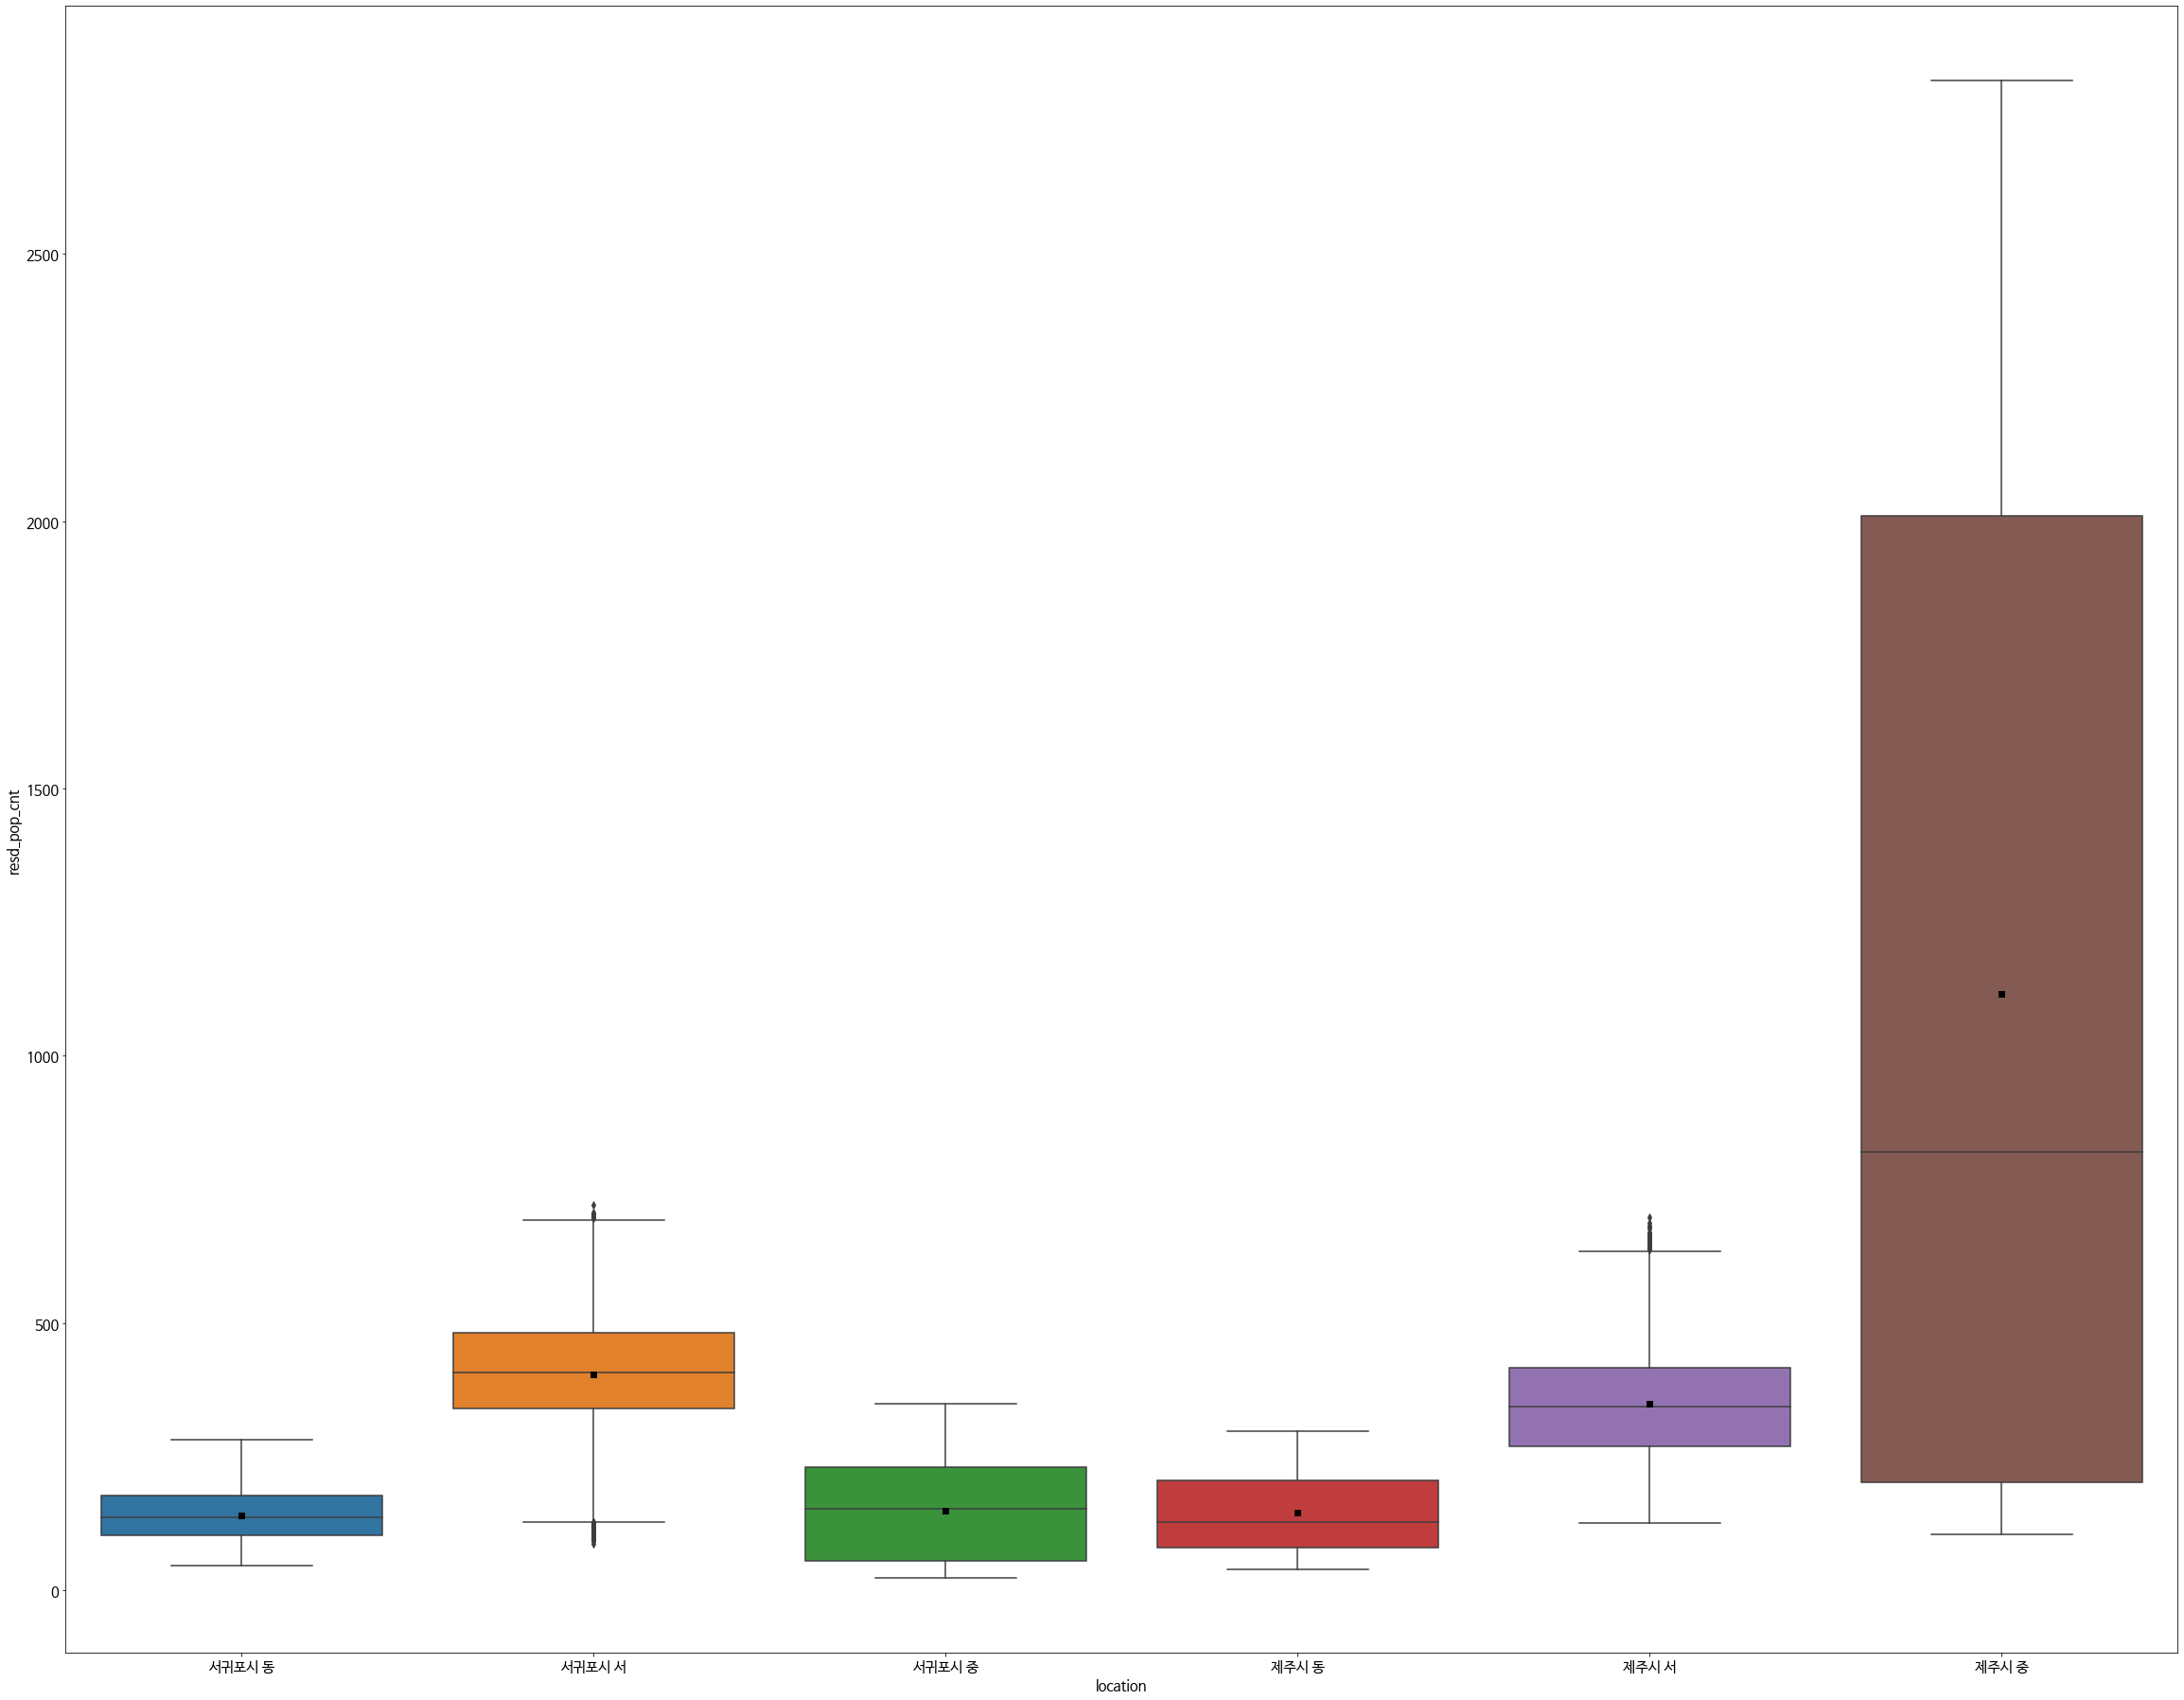

In [ ]:
figure = plt.figure(figsize=(40, 32))
plt.rcParams.update({'font.size': 15})
sns.boxplot(x="location", y="resd_pop_cnt", data=df0, showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"black", "markeredgecolor":"black"})

## 2) work_pop_cnt

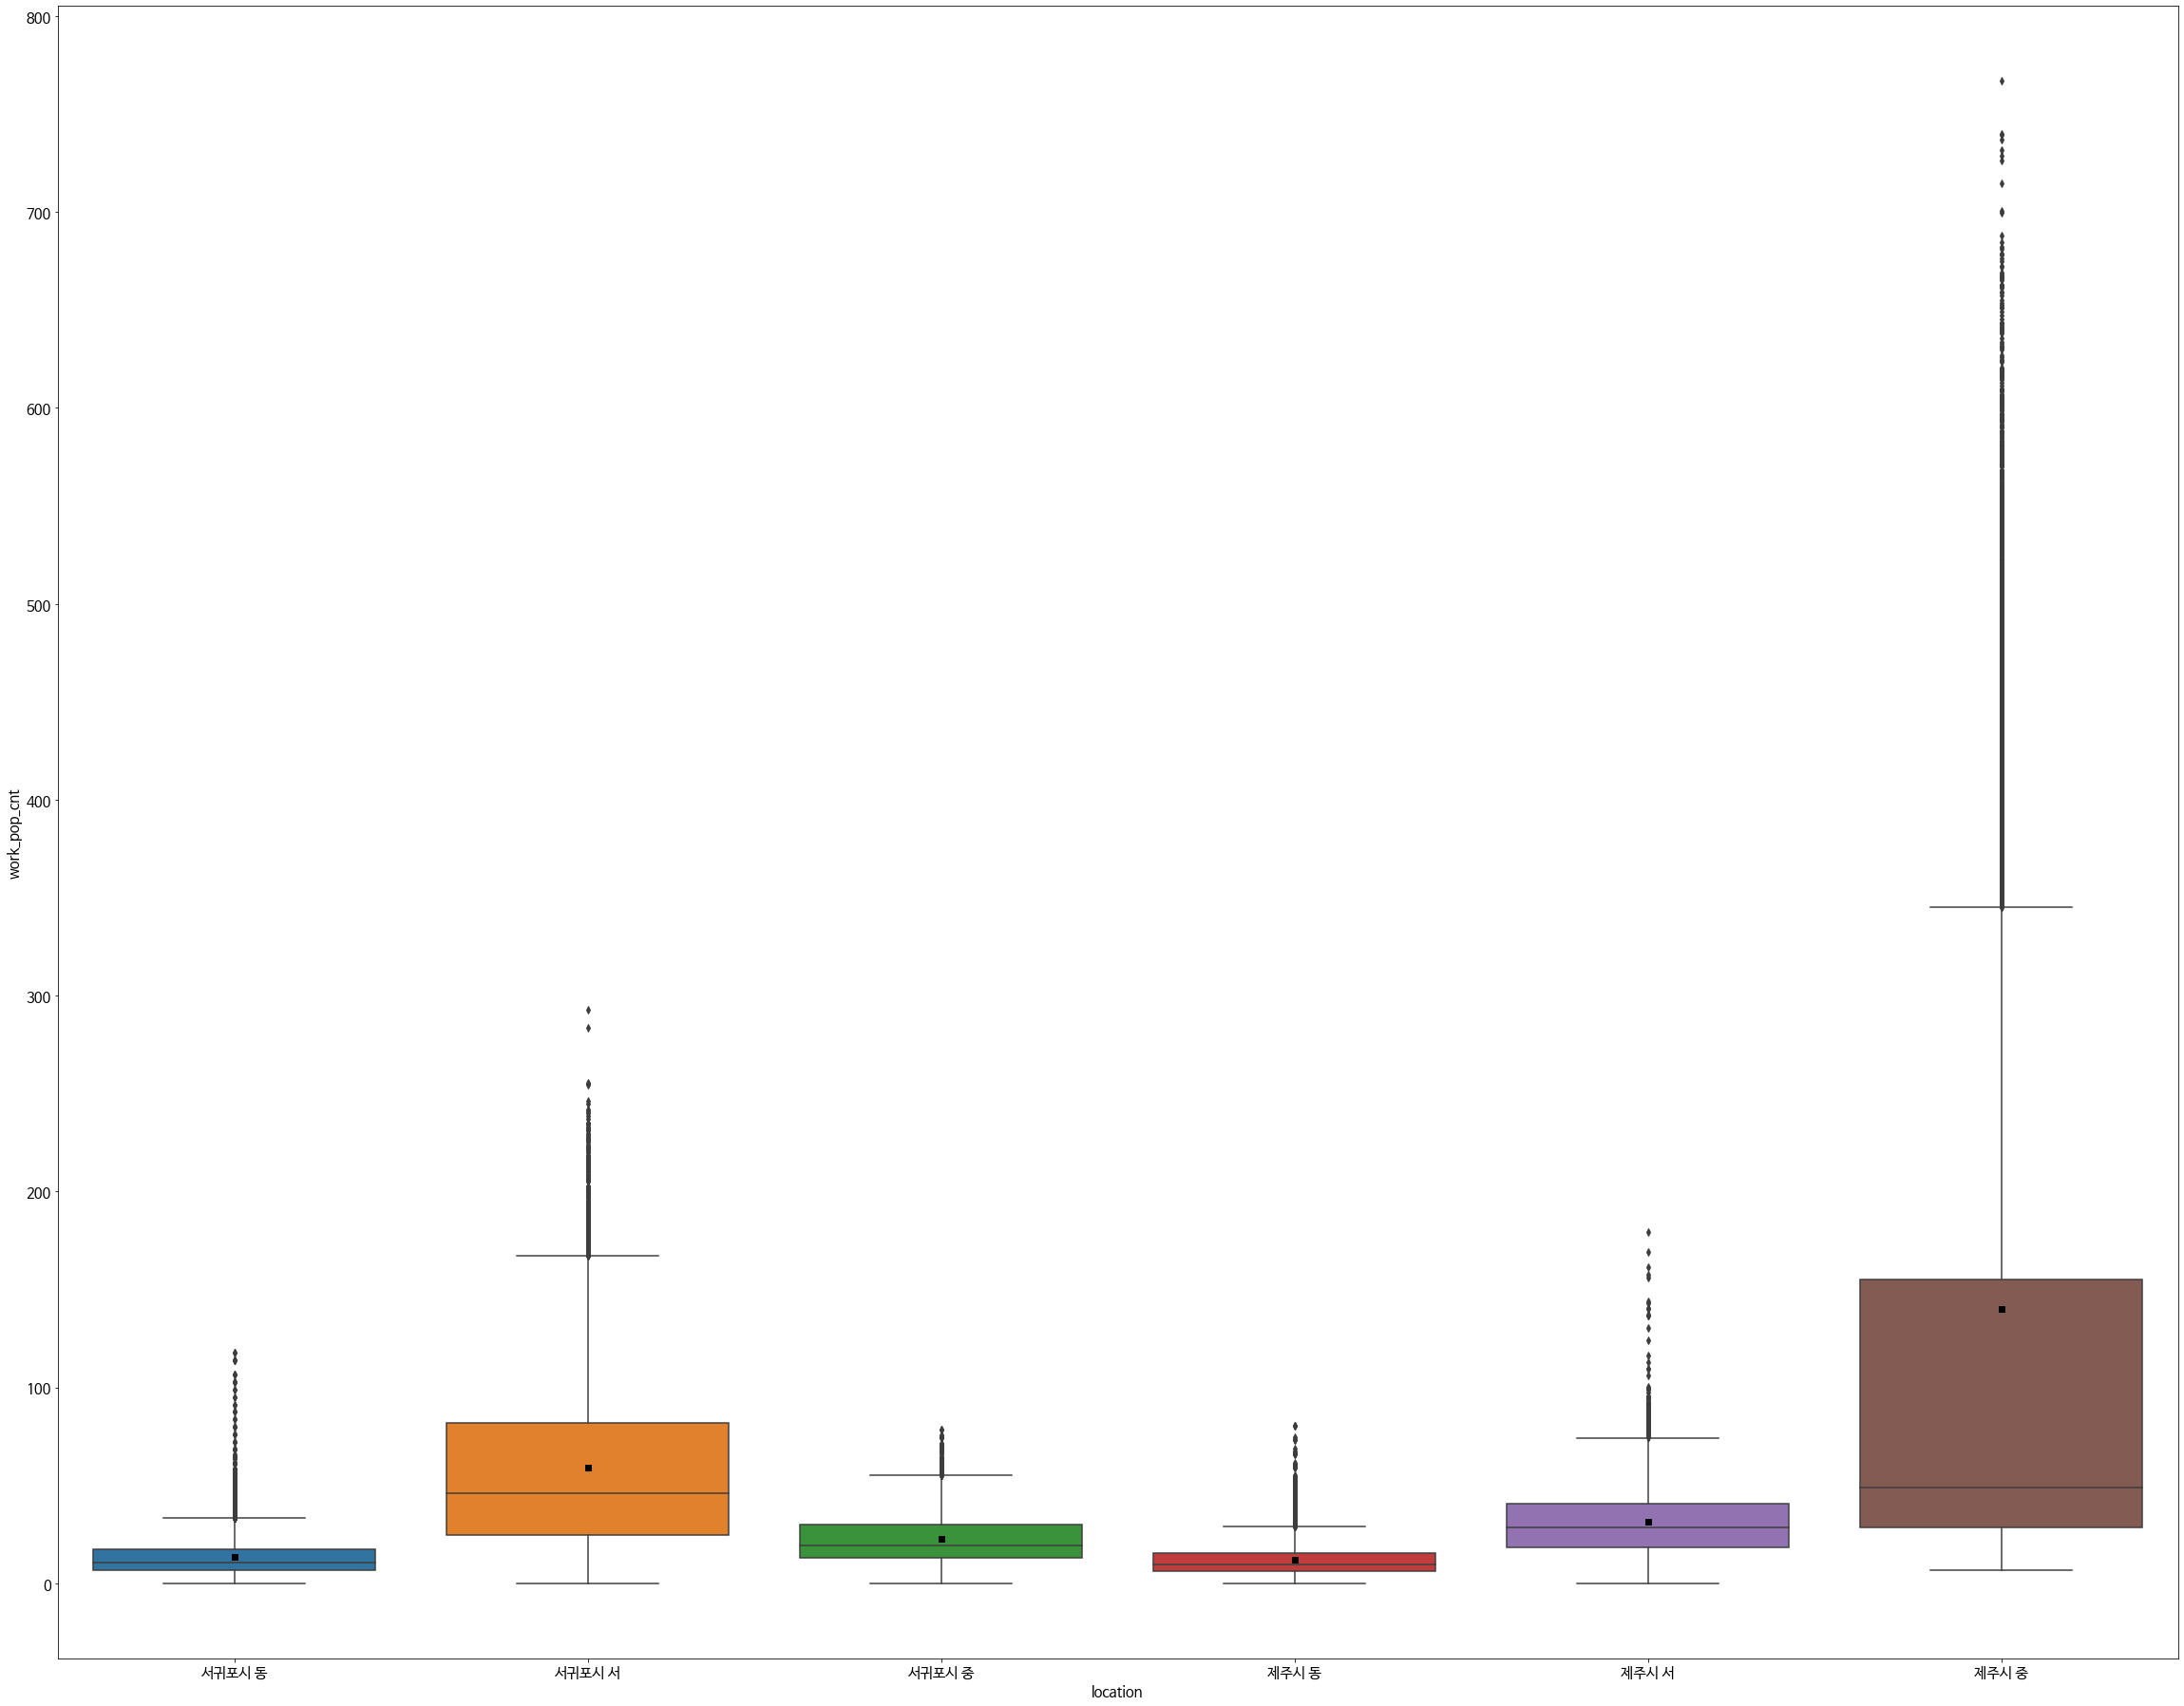

In [ ]:
figure = plt.figure(figsize=(40, 32))
plt.rcParams.update({'font.size': 15})
sns.boxplot(x="location", y="work_pop_cnt", data=df0, showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"black", "markeredgecolor":"black"})

## 3) visit_pop_cnt

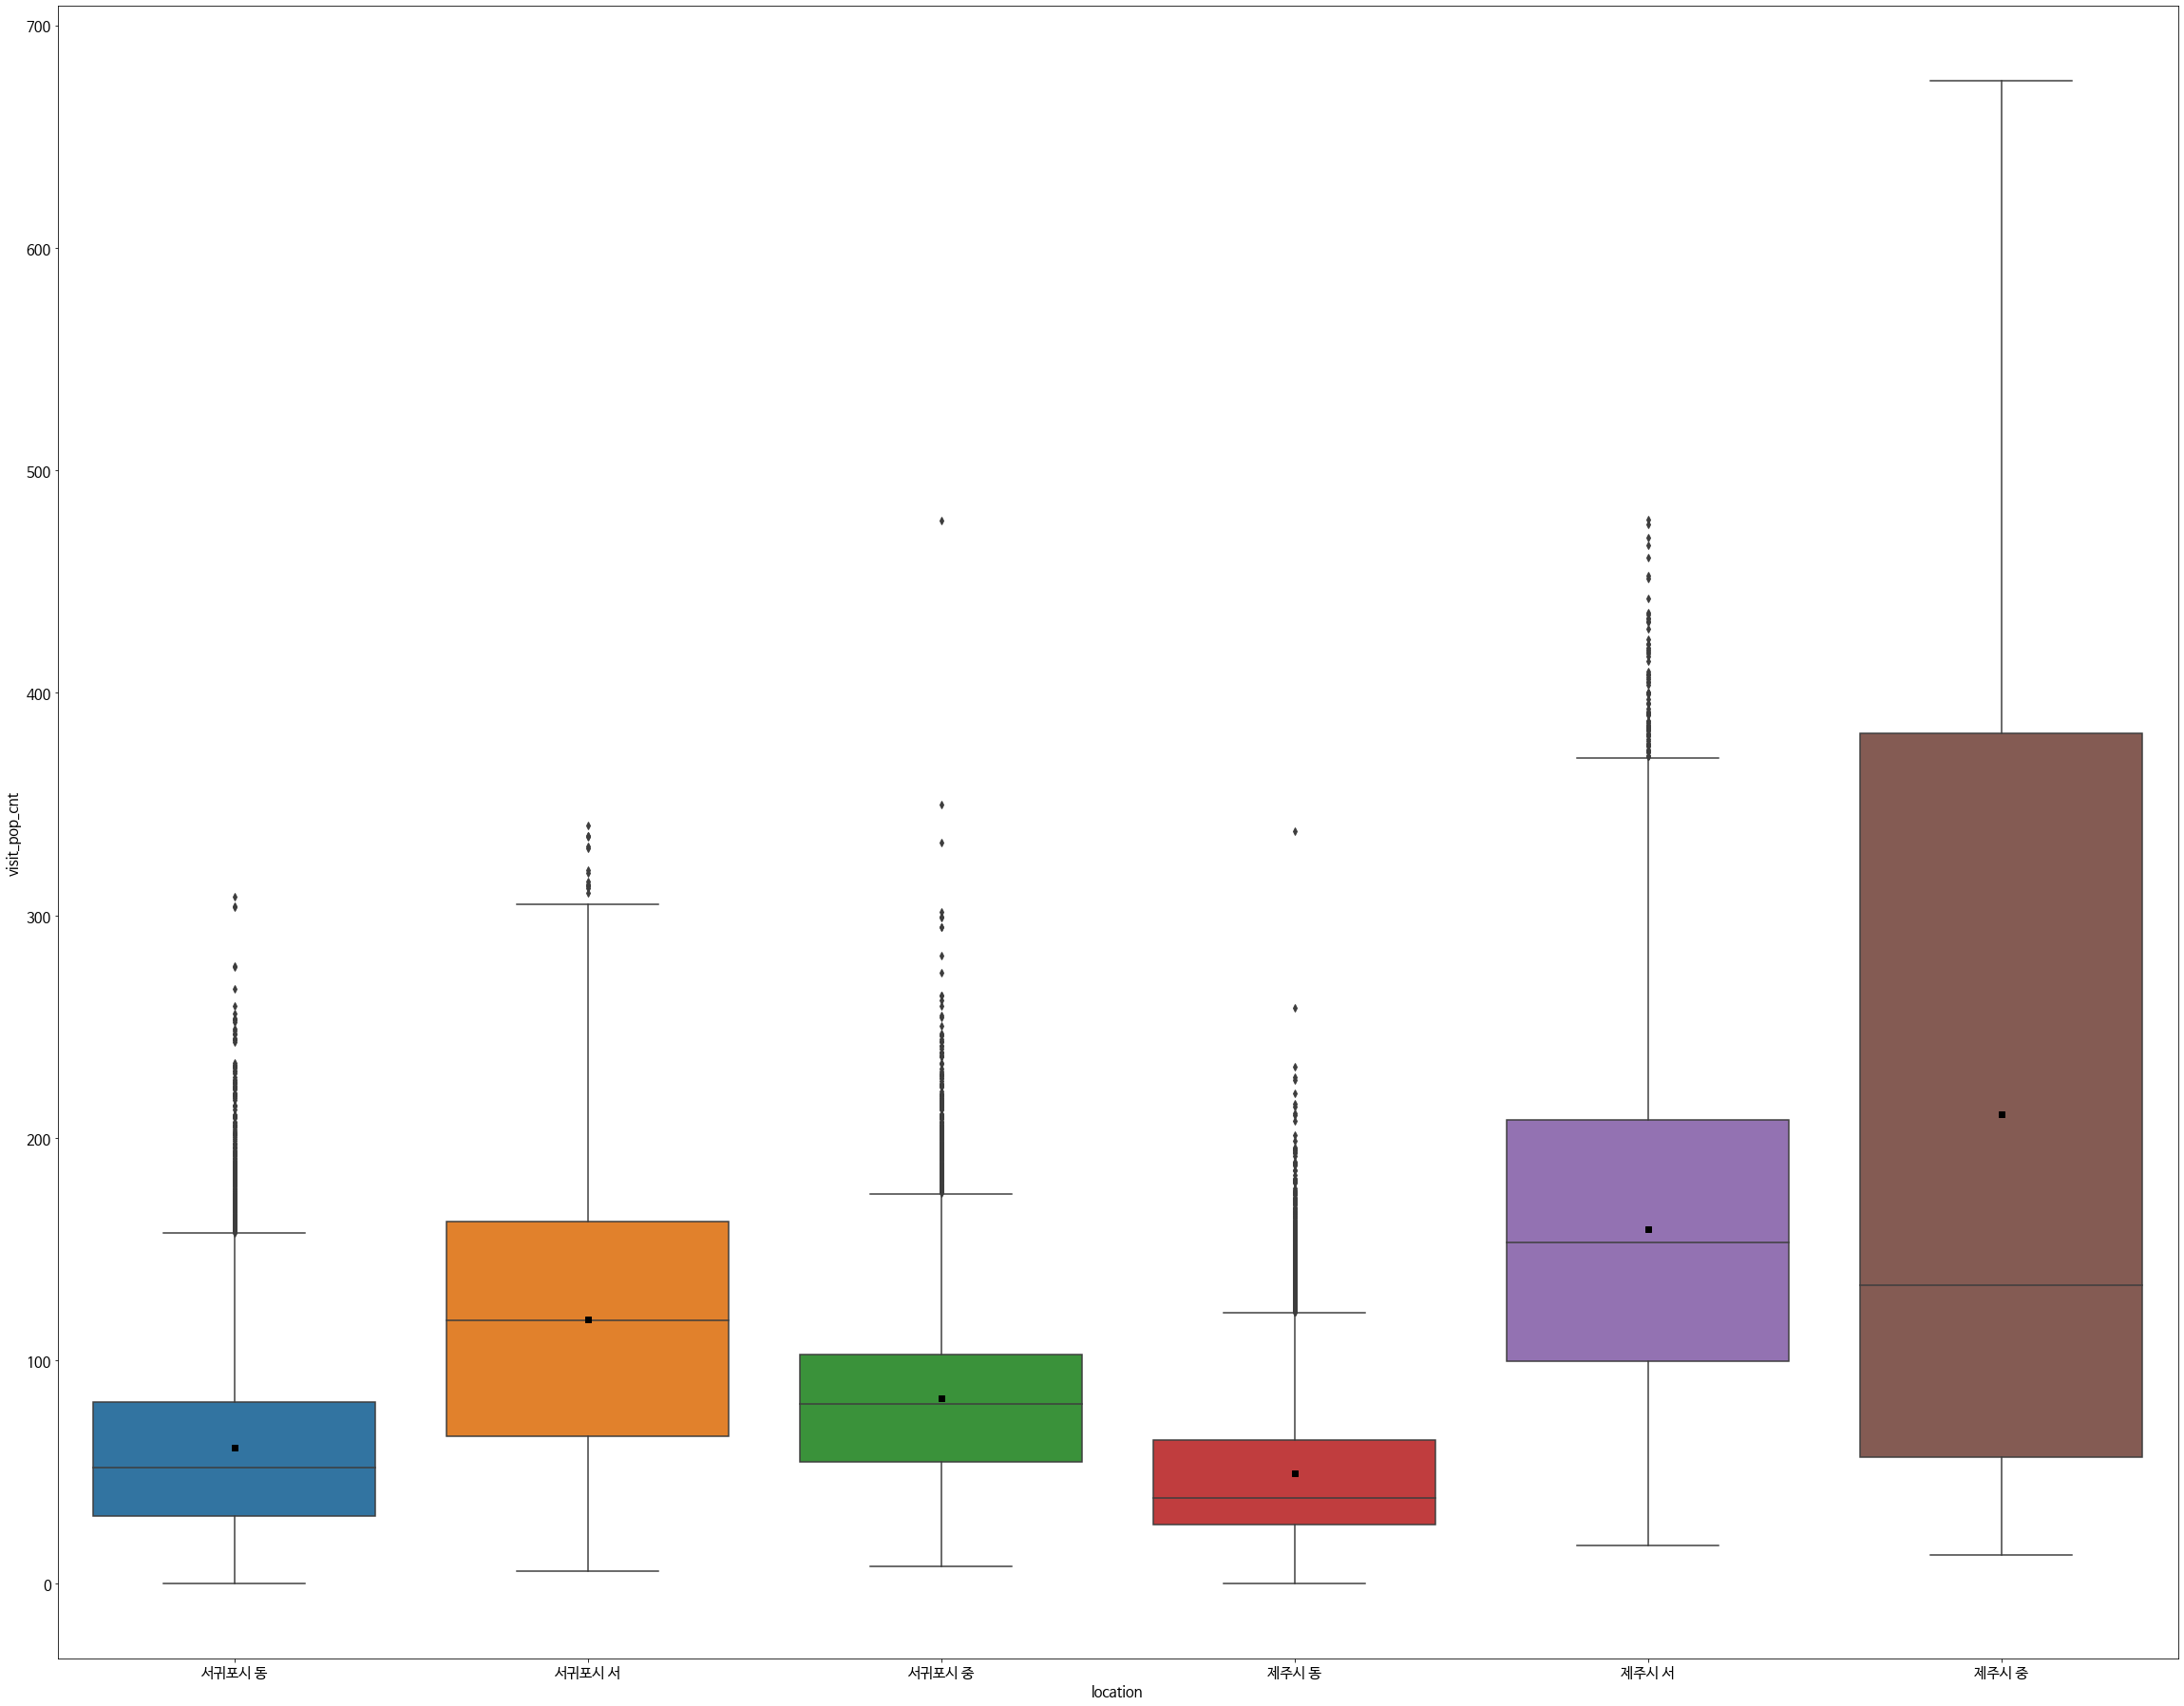

In [ ]:
figure = plt.figure(figsize=(40, 32))
plt.rcParams.update({'font.size': 15})
sns.boxplot(x="location", y="visit_pop_cnt", data=df0, showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"black", "markeredgecolor":"black"})

# 3. 데이터 전처리

1) 시간대 분할

2) 데이터 분할(resd 변수 기준)

3) 지역 재분류(6개 구역)

4) 시간대 변수 생성

5) 데이터 병합

## 1) 시간대 분할
n_resd_12, n_resd_24, n_work_12, n_work_24, n_visit_12, n_visit_24 : 6개 지역 기준, max로 그룹화

In [ ]:
cond1 = [
         df0['time'] <= 6,
         (df0['time'] > 6) & (df0['time'] <= 18),
         (df0['time'] > 18) & (df0['time'] <= 24),
]

choice1 = [
           '밤',
           '낮',
           '밤'
]

df0['time_2'] = np.select(cond1, choice1, default='NA')

In [ ]:
df0.columns

Index(['base_date', 'time', 'nationality', 'city', 'emd_cd', 'emd_nm',
       'resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt', 'resd', 'time_2'],
      dtype='object')

In [ ]:
# 날짜, 시간대, 국적, 도시, 지역명, 거주지역 기준, pop_cnt 최대값으로 그룹화
df1 = df0.groupby(['base_date','time_2','nationality', 'city', 'emd_cd', 'emd_nm', 'resd']).max()
df1 = df1.reset_index()
df1

,base_date,time_2,nationality,city,emd_cd,emd_nm,resd,time,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01-01,낮,AUS,서귀포시,50130250,대정읍,제주,15,8.2386,0.0000,5.9607
1,2018-01-01,낮,AUS,서귀포시,50130253,남원읍,제주,17,0.0000,0.0000,5.9677
2,2018-01-01,낮,AUS,서귀포시,50130259,성산읍,제주,14,0.0000,0.0000,11.9213
3,2018-01-01,낮,AUS,서귀포시,50130310,안덕면,그외,16,0.0000,0.0000,5.9607
4,2018-01-01,낮,AUS,서귀포시,50130310,안덕면,제주,18,32.9545,8.2220,23.8426
...,...,...,...,...,...,...,...,...,...,...,...
2866913,2021-06-30,밤,VNM,제주시,50110670,외도동,제주,24,15.1014,3.7754,7.5507
2866914,2021-06-30,밤,VNM,제주시,50110680,이호동,그외,24,0.0000,0.0000,22.6522
2866915,2021-06-30,밤,VNM,제주시,50110680,이호동,제주,24,22.6522,0.0000,22.6522
2866916,2021-06-30,밤,VNM,제주시,50110690,도두동,그외,24,0.0000,0.0000,11.3261


In [ ]:
df1 = df1.drop(['time'], axis=1)

## 2) 데이터 분할(resd 변수 기준)

### * resd=제주

In [ ]:
df_jeju = df1[df1['resd'] == '제주']

In [ ]:
df_jeju = df_jeju.drop(['resd'], axis=1)
df_jeju

,base_date,time_2,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01-01,낮,AUS,서귀포시,50130250,대정읍,8.2386,0.0000,5.9607
1,2018-01-01,낮,AUS,서귀포시,50130253,남원읍,0.0000,0.0000,5.9677
2,2018-01-01,낮,AUS,서귀포시,50130259,성산읍,0.0000,0.0000,11.9213
4,2018-01-01,낮,AUS,서귀포시,50130310,안덕면,32.9545,8.2220,23.8426
5,2018-01-01,낮,AUS,서귀포시,50130320,표선면,0.0000,0.0000,5.9536
...,...,...,...,...,...,...,...,...,...
2866909,2021-06-30,밤,VNM,제주시,50110650,연동,173.6667,26.4275,45.3043
2866911,2021-06-30,밤,VNM,제주시,50110660,노형동,147.2391,37.7536,41.5290
2866913,2021-06-30,밤,VNM,제주시,50110670,외도동,15.1014,3.7754,7.5507
2866915,2021-06-30,밤,VNM,제주시,50110680,이호동,22.6522,0.0000,22.6522


In [ ]:
# 날짜, 시간대, 국적, 도시, 지역명, 거주지역 기준, pop_cnt 합으로 그룹화
df_jeju2 = df_jeju.groupby(['base_date','time_2', 'city', 'emd_cd', 'emd_nm']).sum()
df_jeju2 = df_jeju2.reset_index()
df_jeju2

,base_date,time_2,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01-01,낮,서귀포시,50130250,대정읍,1066.0740,13.0664,270.6256
1,2018-01-01,낮,서귀포시,50130253,남원읍,328.2548,15.1443,194.9233
2,2018-01-01,낮,서귀포시,50130259,성산읍,565.2860,50.8318,417.2296
3,2018-01-01,낮,서귀포시,50130310,안덕면,774.4354,163.9979,320.0297
4,2018-01-01,낮,서귀포시,50130320,표선면,352.3231,8.7340,112.4051
...,...,...,...,...,...,...,...,...
109813,2021-06-30,밤,제주시,50110650,연동,2561.4514,195.5954,579.1678
109814,2021-06-30,밤,제주시,50110660,노형동,2017.5754,163.1943,700.2975
109815,2021-06-30,밤,제주시,50110670,외도동,188.3524,21.9826,72.1834
109816,2021-06-30,밤,제주시,50110680,이호동,150.9372,23.5358,128.9502


### * resd=그외

In [ ]:
df_etc = df1[df1['resd'] == '그외']

In [ ]:
df_etc = df_etc.drop(['resd'], axis=1)
df_etc

,base_date,time_2,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
3,2018-01-01,낮,AUS,서귀포시,50130310,안덕면,0.0,0.0000,5.9607
9,2018-01-01,낮,AUS,서귀포시,50130590,대륜동,0.0,8.2025,0.0000
12,2018-01-01,낮,AUS,서귀포시,50130620,예래동,0.0,0.0000,5.9465
18,2018-01-01,낮,AUS,제주시,50110550,삼도1동,0.0,0.0000,5.9116
21,2018-01-01,낮,AUS,제주시,50110580,용담2동,0.0,0.0000,5.9677
...,...,...,...,...,...,...,...,...,...
2866908,2021-06-30,밤,VNM,제주시,50110650,연동,0.0,0.0000,30.2029
2866910,2021-06-30,밤,VNM,제주시,50110660,노형동,0.0,0.0000,60.4058
2866912,2021-06-30,밤,VNM,제주시,50110670,외도동,0.0,0.0000,7.5507
2866914,2021-06-30,밤,VNM,제주시,50110680,이호동,0.0,0.0000,22.6522


In [ ]:
# 날짜, 시간대, 국적, 도시, 지역명, 거주지역 기준, pop_cnt 합으로 그룹화
df_etc2 = df_etc.groupby(['base_date','time_2', 'city', 'emd_cd', 'emd_nm']).sum()
df_etc2 = df_etc2.reset_index()
df_etc2

,base_date,time_2,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01-01,낮,서귀포시,50130250,대정읍,0.0,35.5750,152.2208
1,2018-01-01,낮,서귀포시,50130253,남원읍,0.0,37.1352,131.6772
2,2018-01-01,낮,서귀포시,50130259,성산읍,0.0,29.1916,267.4784
3,2018-01-01,낮,서귀포시,50130310,안덕면,0.0,23.6567,203.9756
4,2018-01-01,낮,서귀포시,50130320,표선면,0.0,28.3955,123.1803
...,...,...,...,...,...,...,...,...
109797,2021-06-30,밤,제주시,50110650,연동,0.0,32.1340,904.5847
109798,2021-06-30,밤,제주시,50110660,노형동,0.0,30.6144,541.0726
109799,2021-06-30,밤,제주시,50110670,외도동,0.0,5.2404,108.9141
109800,2021-06-30,밤,제주시,50110680,이호동,0.0,0.0000,129.6280


## 3) 지역 재분류(6개 구역)
region : 6개(제주시-동, 제주시-중, 제주시-서, 서귀포시-동, 서귀포시-중, 서귀포시-서)

### * resd=제주

In [ ]:
def test(x) :
  if x in ['성산읍','표선면','남원읍'] : return '서귀포시_동'
  elif x in ['대륜동','대천동','동홍동','서홍동','송산동','영천동','예래동','정방동','중문동','중앙동','천지동','효돈동'] : return '서귀포시_중'
  elif x in ['대정읍','안덕면'] : return '서귀포시_서'
  elif x in ['구좌읍','조천읍'] : return '제주시_동'
  elif x in ['건입동','노형동','도두동','봉개동','삼도2동','삼도1동','삼양동','아라동','연동','오라동','외도동','용담2동','용담1동','이도2동','이도1동','이호동','일도2동','일도1동','화북동'] : return '제주시_중'
  elif x in ['애월읍','한림읍','한경면'] : return '제주시_서'

df_jeju2['region'] = df_jeju2['emd_nm'].apply(test)

In [ ]:
df_jeju2

,base_date,time_2,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,region
0,2018-01-01,낮,서귀포시,50130250,대정읍,1066.0740,13.0664,270.6256,서귀포시_서
1,2018-01-01,낮,서귀포시,50130253,남원읍,328.2548,15.1443,194.9233,서귀포시_동
2,2018-01-01,낮,서귀포시,50130259,성산읍,565.2860,50.8318,417.2296,서귀포시_동
3,2018-01-01,낮,서귀포시,50130310,안덕면,774.4354,163.9979,320.0297,서귀포시_서
4,2018-01-01,낮,서귀포시,50130320,표선면,352.3231,8.7340,112.4051,서귀포시_동
...,...,...,...,...,...,...,...,...,...
109813,2021-06-30,밤,제주시,50110650,연동,2561.4514,195.5954,579.1678,제주시_중
109814,2021-06-30,밤,제주시,50110660,노형동,2017.5754,163.1943,700.2975,제주시_중
109815,2021-06-30,밤,제주시,50110670,외도동,188.3524,21.9826,72.1834,제주시_중
109816,2021-06-30,밤,제주시,50110680,이호동,150.9372,23.5358,128.9502,제주시_중


In [ ]:
df_jeju2.columns

Index(['base_date', 'time_2', 'city', 'emd_cd', 'emd_nm', 'resd_pop_cnt',
       'work_pop_cnt', 'visit_pop_cnt', 'region'],
      dtype='object')

### * resd=그외

In [ ]:
def test(x) :
  if x in ['성산읍','표선면','남원읍'] : return '서귀포시_동'
  elif x in ['대륜동','대천동','동홍동','서홍동','송산동','영천동','예래동','정방동','중문동','중앙동','천지동','효돈동'] : return '서귀포시_중'
  elif x in ['대정읍','안덕면'] : return '서귀포시_서'
  elif x in ['구좌읍','조천읍'] : return '제주시_동'
  elif x in ['건입동','노형동','도두동','봉개동','삼도2동','삼도1동','삼양동','아라동','연동','오라동','외도동','용담2동','용담1동','이도2동','이도1동','이호동','일도2동','일도1동','화북동'] : return '제주시_중'
  elif x in ['애월읍','한림읍','한경면'] : return '제주시_서'

df_etc2['region'] = df_etc2['emd_nm'].apply(test)

In [ ]:
df_etc2

,base_date,time_2,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,region
0,2018-01-01,낮,서귀포시,50130250,대정읍,0.0,35.5750,152.2208,서귀포시_서
1,2018-01-01,낮,서귀포시,50130253,남원읍,0.0,37.1352,131.6772,서귀포시_동
2,2018-01-01,낮,서귀포시,50130259,성산읍,0.0,29.1916,267.4784,서귀포시_동
3,2018-01-01,낮,서귀포시,50130310,안덕면,0.0,23.6567,203.9756,서귀포시_서
4,2018-01-01,낮,서귀포시,50130320,표선면,0.0,28.3955,123.1803,서귀포시_동
...,...,...,...,...,...,...,...,...,...
109797,2021-06-30,밤,제주시,50110650,연동,0.0,32.1340,904.5847,제주시_중
109798,2021-06-30,밤,제주시,50110660,노형동,0.0,30.6144,541.0726,제주시_중
109799,2021-06-30,밤,제주시,50110670,외도동,0.0,5.2404,108.9141,제주시_중
109800,2021-06-30,밤,제주시,50110680,이호동,0.0,0.0000,129.6280,제주시_중


In [ ]:
df_etc2.columns

Index(['base_date', 'time_2', 'city', 'emd_cd', 'emd_nm', 'resd_pop_cnt',
       'work_pop_cnt', 'visit_pop_cnt', 'region'],
      dtype='object')

## 4) 시간대 변수 생성

### * resd=제주

In [ ]:
data12 = df_jeju2[df_jeju2['time_2'] == '낮'].drop(['time_2'], axis = 1)
data24 = df_jeju2[df_jeju2['time_2'] == '밤'].drop(['time_2'], axis = 1)

In [ ]:
data12.columns = ['base_date', 'city', 'emd_cd', 'emd_nm', 'f_l_j_resd_12', 'f_l_j_work_12', 'f_l_j_visit_12', 'region']
data24.columns = ['base_date', 'city', 'emd_cd', 'emd_nm', 'f_l_j_resd_24', 'f_l_j_work_24', 'f_l_j_visit_24', 'region']

In [ ]:
mg_jeju = pd.merge(data12,data24, how='outer',on=['base_date', 'city', 'emd_cd', 'emd_nm', 'region'])
mg_jeju

,base_date,city,emd_cd,emd_nm,f_l_j_resd_12,f_l_j_work_12,f_l_j_visit_12,region,f_l_j_resd_24,f_l_j_work_24,f_l_j_visit_24
0,2018-01-01,서귀포시,50130250,대정읍,1066.0740,13.0664,270.6256,서귀포시_서,1129.0599,24.0387,226.4320
1,2018-01-01,서귀포시,50130253,남원읍,328.2548,15.1443,194.9233,서귀포시_동,345.7900,15.2458,69.6760
2,2018-01-01,서귀포시,50130259,성산읍,565.2860,50.8318,417.2296,서귀포시_동,587.2609,26.4585,273.7653
3,2018-01-01,서귀포시,50130310,안덕면,774.4354,163.9979,320.0297,서귀포시_서,870.6209,125.2491,232.6036
4,2018-01-01,서귀포시,50130320,표선면,352.3231,8.7340,112.4051,서귀포시_동,378.4108,7.3327,73.9492
...,...,...,...,...,...,...,...,...,...,...,...
54906,2021-06-30,제주시,50110660,노형동,1904.9165,223.3201,734.2286,제주시_중,2017.5754,163.1943,700.2975
54907,2021-06-30,제주시,50110670,외도동,174.7087,18.6687,88.9797,제주시_중,188.3524,21.9826,72.1834
54908,2021-06-30,제주시,50110680,이호동,123.8899,35.8655,130.5498,제주시_중,150.9372,23.5358,128.9502
54909,2021-06-30,제주시,50110690,도두동,79.5474,45.4058,117.7125,제주시_중,77.3760,15.7211,67.8271


### * resd=그외

In [ ]:
data12 = df_etc2[df_etc2['time_2'] == '낮'].drop(['time_2'], axis = 1)
data24 = df_etc2[df_etc2['time_2'] == '밤'].drop(['time_2'], axis = 1)

In [ ]:
data12.columns = ['base_date', 'city', 'emd_cd', 'emd_nm', 'f_l_e_resd_12', 'f_l_e_work_12', 'f_l_e_visit_12', 'region']
data24.columns = ['base_date', 'city', 'emd_cd', 'emd_nm', 'f_l_e_resd_24', 'f_l_e_work_24', 'f_l_e_visit_24', 'region']

In [ ]:
mg_etc = pd.merge(data12,data24, how='outer',on=['base_date', 'city', 'emd_cd', 'emd_nm', 'region'])
mg_etc

,base_date,city,emd_cd,emd_nm,f_l_e_resd_12,f_l_e_work_12,f_l_e_visit_12,region,f_l_e_resd_24,f_l_e_work_24,f_l_e_visit_24
0,2018-01-01,서귀포시,50130250,대정읍,0.0,35.5750,152.2208,서귀포시_서,0.0,29.8549,119.3026
1,2018-01-01,서귀포시,50130253,남원읍,0.0,37.1352,131.6772,서귀포시_동,0.0,54.7028,75.8742
2,2018-01-01,서귀포시,50130259,성산읍,0.0,29.1916,267.4784,서귀포시_동,0.0,29.5355,178.0462
3,2018-01-01,서귀포시,50130310,안덕면,0.0,23.6567,203.9756,서귀포시_서,0.0,46.3578,159.0939
4,2018-01-01,서귀포시,50130320,표선면,0.0,28.3955,123.1803,서귀포시_동,0.0,36.7293,64.5151
...,...,...,...,...,...,...,...,...,...,...,...
54904,2021-06-30,제주시,50110670,외도동,0.0,5.2404,125.5656,제주시_중,0.0,5.2404,108.9141
54905,2021-06-30,제주시,50110680,이호동,0.0,0.0000,155.5012,제주시_중,0.0,0.0000,129.6280
54906,2021-06-30,제주시,50110690,도두동,0.0,0.0000,155.3555,제주시_중,0.0,0.0000,98.5622
54907,2019-09-22,제주시,50110330,우도면,NaN,NaN,NaN,None,0.0,0.0000,6.4832


## 5) 데이터 병합

In [ ]:
final = pd.merge(mg_jeju,mg_etc, how='outer',on=['base_date', 'city', 'emd_cd', 'emd_nm', 'region'])
final

,base_date,city,emd_cd,emd_nm,f_l_j_resd_12,f_l_j_work_12,f_l_j_visit_12,region,f_l_j_resd_24,f_l_j_work_24,f_l_j_visit_24,f_l_e_resd_12,f_l_e_work_12,f_l_e_visit_12,f_l_e_resd_24,f_l_e_work_24,f_l_e_visit_24
0,2018-01-01,서귀포시,50130250,대정읍,1066.0740,13.0664,270.6256,서귀포시_서,1129.0599,24.0387,226.4320,0.0,35.5750,152.2208,0.0,29.8549,119.3026
1,2018-01-01,서귀포시,50130253,남원읍,328.2548,15.1443,194.9233,서귀포시_동,345.7900,15.2458,69.6760,0.0,37.1352,131.6772,0.0,54.7028,75.8742
2,2018-01-01,서귀포시,50130259,성산읍,565.2860,50.8318,417.2296,서귀포시_동,587.2609,26.4585,273.7653,0.0,29.1916,267.4784,0.0,29.5355,178.0462
3,2018-01-01,서귀포시,50130310,안덕면,774.4354,163.9979,320.0297,서귀포시_서,870.6209,125.2491,232.6036,0.0,23.6567,203.9756,0.0,46.3578,159.0939
4,2018-01-01,서귀포시,50130320,표선면,352.3231,8.7340,112.4051,서귀포시_동,378.4108,7.3327,73.9492,0.0,28.3955,123.1803,0.0,36.7293,64.5151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54906,2021-06-30,제주시,50110660,노형동,1904.9165,223.3201,734.2286,제주시_중,2017.5754,163.1943,700.2975,0.0,25.3740,503.8571,0.0,30.6144,541.0726
54907,2021-06-30,제주시,50110670,외도동,174.7087,18.6687,88.9797,제주시_중,188.3524,21.9826,72.1834,0.0,5.2404,125.5656,0.0,5.2404,108.9141
54908,2021-06-30,제주시,50110680,이호동,123.8899,35.8655,130.5498,제주시_중,150.9372,23.5358,128.9502,0.0,0.0000,155.5012,0.0,0.0000,129.6280
54909,2021-06-30,제주시,50110690,도두동,79.5474,45.4058,117.7125,제주시_중,77.3760,15.7211,67.8271,0.0,0.0000,155.3555,0.0,0.0000,98.5622


In [ ]:
final.to_csv('/content/drive/MyDrive/21 세미프로젝트_2차 (1)/코드_현정/newdata3_장기체류_외국인_유동인구', encoding='cp949', index=False)

# 4. 데이터 분포 재확인


## 1) 시간대별

### (1) 2018년

In [ ]:
test18 = data1[data1['base_date'].dt.year==2018]
test18 = test18.groupby(['time']).sum()
test18

In [ ]:
test18_2 = df1[df1['base_date'].dt.year==2018]
test18_2 = test18_2.groupby(['time_2']).sum()
test18_2

,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,week_date,weekend,year,month,day
time_2,,,,,,,,
새벽,1.929581e+06,107578.6741,234053.8033,13104,1248,8838840,28584,68856
오전,1.844789e+06,327264.0247,442022.4624,13104,1248,8838840,28584,68856
오후,1.528140e+06,384189.1066,518901.7991,13104,1248,8838840,28584,68856
저녁,1.900905e+06,295023.1455,440206.6402,13104,1248,8838840,28584,68856


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48317 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_

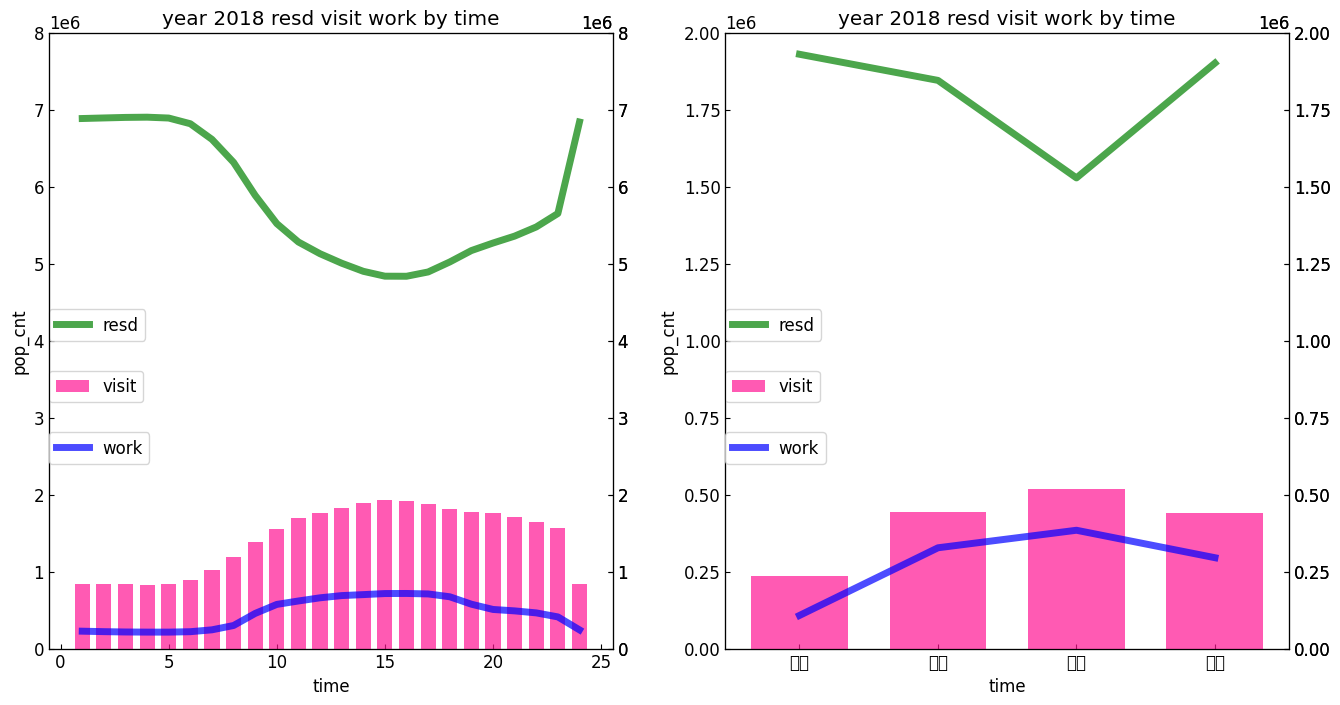

In [ ]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(1, 25)
y1 = np.array(test18['resd_pop_cnt'])
y2 = np.array(test18['visit_pop_cnt'])
y3 = np.array(test18['work_pop_cnt'])

x_2 = test18_2.index
y1_2 = np.array(test18_2['resd_pop_cnt'])
y2_2 = np.array(test18_2['visit_pop_cnt'])
y3_2 = np.array(test18_2['work_pop_cnt'])

# 3. 그래프 그리기
fig = plt.figure()
ax1 = plt.subplot(1,2,1)
ax4 = plt.subplot(1,2,2)

## 1) time 변수
ax1.plot(x, y1, color='green', markersize=7, linewidth=5, alpha=0.7, label='resd')
ax1.set_ylim(0, 8000000)
ax1.set_xlabel('time')
ax1.set_ylabel('pop_cnt')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='visit', alpha=0.7, width=0.7)
ax2.set_ylim(0, 8000000)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

ax3 = ax1.twinx()
ax3.plot(x, y3, color='blue', markersize=7, linewidth=5, alpha=0.7, label='work')
ax3.set_ylim(0, 8000000)
ax3.tick_params(axis='both', direction='in')

ax1.legend(loc=(0, 0.5), ncol=1)
ax2.legend(loc=(0, 0.4), ncol=1)
ax3.legend(loc=(0, 0.3), ncol=1)

plt.title('year 2018 resd visit work by time')

## 2)time_2 변수
ax4.plot(x_2, y1_2, color='green', markersize=7, linewidth=5, alpha=0.7, label='resd')
ax4.set_ylim(0, 2000000)
ax4.set_xlabel('time')
ax4.set_ylabel('pop_cnt')
ax4.tick_params(axis='both', direction='in')

ax5 = ax4.twinx()
ax5.bar(x_2, y2_2, color='deeppink', label='visit', alpha=0.7, width=0.7)
ax5.set_ylim(0, 2000000)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
ax5.tick_params(axis='y', direction='in')

ax6 = ax4.twinx()
ax6.plot(x_2, y3_2, color='blue', markersize=7, linewidth=5, alpha=0.7, label='work')
ax6.set_ylim(0, 2000000)
ax6.tick_params(axis='both', direction='in')

ax4.legend(loc=(0, 0.5), ncol=1)
ax5.legend(loc=(0, 0.4), ncol=1)
ax6.legend(loc=(0, 0.3), ncol=1)


plt.title('year 2018 resd visit work by time')
plt.show()

### (2) 2019년

In [ ]:
test19 = data1[data1['base_date'].dt.year==2019]
test19 = test19.groupby(['time']).sum()
test19

In [ ]:
test19_2 = df1[df1['base_date'].dt.year==2019]
test19_2 = test19_2.groupby(['time_2']).sum()
test19_2

,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,week_date,weekend,year,month,day
time_2,,,,,,,,
새벽,1.801972e+06,97228.3542,326176.8624,13116,1248,8843220,28584,68856
오전,1.722337e+06,262021.5660,585948.9586,13116,1248,8843220,28584,68856
오후,1.451892e+06,300974.0708,681807.2191,13116,1248,8843220,28584,68856
저녁,1.771401e+06,232290.6801,580928.2848,13116,1248,8843220,28584,68856


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48317 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_

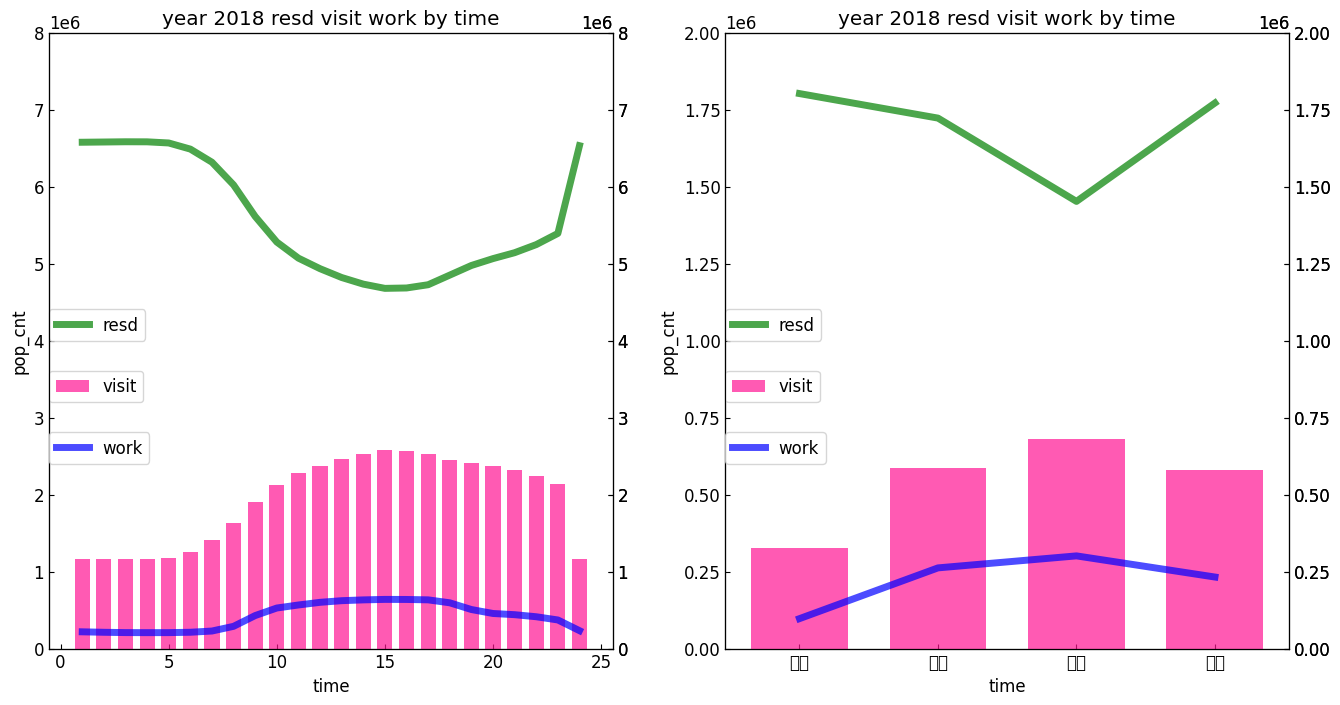

In [ ]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(1, 25)
y1 = np.array(test19['resd_pop_cnt'])
y2 = np.array(test19['visit_pop_cnt'])
y3 = np.array(test19['work_pop_cnt'])

x_2 = test19_2.index
y1_2 = np.array(test19_2['resd_pop_cnt'])
y2_2 = np.array(test19_2['visit_pop_cnt'])
y3_2 = np.array(test19_2['work_pop_cnt'])

# 3. 그래프 그리기
fig = plt.figure()
ax1 = plt.subplot(1,2,1)
ax4 = plt.subplot(1,2,2)

## 1) time 변수
ax1.plot(x, y1, color='green', markersize=7, linewidth=5, alpha=0.7, label='resd')
ax1.set_ylim(0, 8000000)
ax1.set_xlabel('time')
ax1.set_ylabel('pop_cnt')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='visit', alpha=0.7, width=0.7)
ax2.set_ylim(0, 8000000)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

ax3 = ax1.twinx()
ax3.plot(x, y3, color='blue', markersize=7, linewidth=5, alpha=0.7, label='work')
ax3.set_ylim(0, 8000000)
ax3.tick_params(axis='both', direction='in')

ax1.legend(loc=(0, 0.5), ncol=1)
ax2.legend(loc=(0, 0.4), ncol=1)
ax3.legend(loc=(0, 0.3), ncol=1)

plt.title('year 2018 resd visit work by time')

## 2)time_2 변수
ax4.plot(x_2, y1_2, color='green', markersize=7, linewidth=5, alpha=0.7, label='resd')
ax4.set_ylim(0, 2000000)
ax4.set_xlabel('time')
ax4.set_ylabel('pop_cnt')
ax4.tick_params(axis='both', direction='in')

ax5 = ax4.twinx()
ax5.bar(x_2, y2_2, color='deeppink', label='visit', alpha=0.7, width=0.7)
ax5.set_ylim(0, 2000000)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
ax5.tick_params(axis='y', direction='in')

ax6 = ax4.twinx()
ax6.plot(x_2, y3_2, color='blue', markersize=7, linewidth=5, alpha=0.7, label='work')
ax6.set_ylim(0, 2000000)
ax6.tick_params(axis='both', direction='in')

ax4.legend(loc=(0, 0.5), ncol=1)
ax5.legend(loc=(0, 0.4), ncol=1)
ax6.legend(loc=(0, 0.3), ncol=1)


plt.title('year 2018 resd visit work by time')
plt.show()

### (3) 2020년

In [ ]:
test20 = data1[data1['base_date'].dt.year==2020]
test20 = test20.groupby(['time']).sum()

In [ ]:
test20_2 = df1[df1['base_date'].dt.year==2020]
test20_2 = test20_2.groupby(['time_2']).sum()
test20_2

,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,week_date,weekend,year,month,day
time_2,,,,,,,,
새벽,1.656745e+06,78508.2033,340782.6093,13164,1248,8871840,28608,69204
오전,1.580907e+06,152726.1187,536334.6643,13164,1248,8871840,28608,69204
오후,1.362978e+06,173789.4527,627542.0354,13164,1248,8871840,28608,69204
저녁,1.634043e+06,136005.7399,546892.7257,13164,1248,8871840,28608,69204


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48317 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_

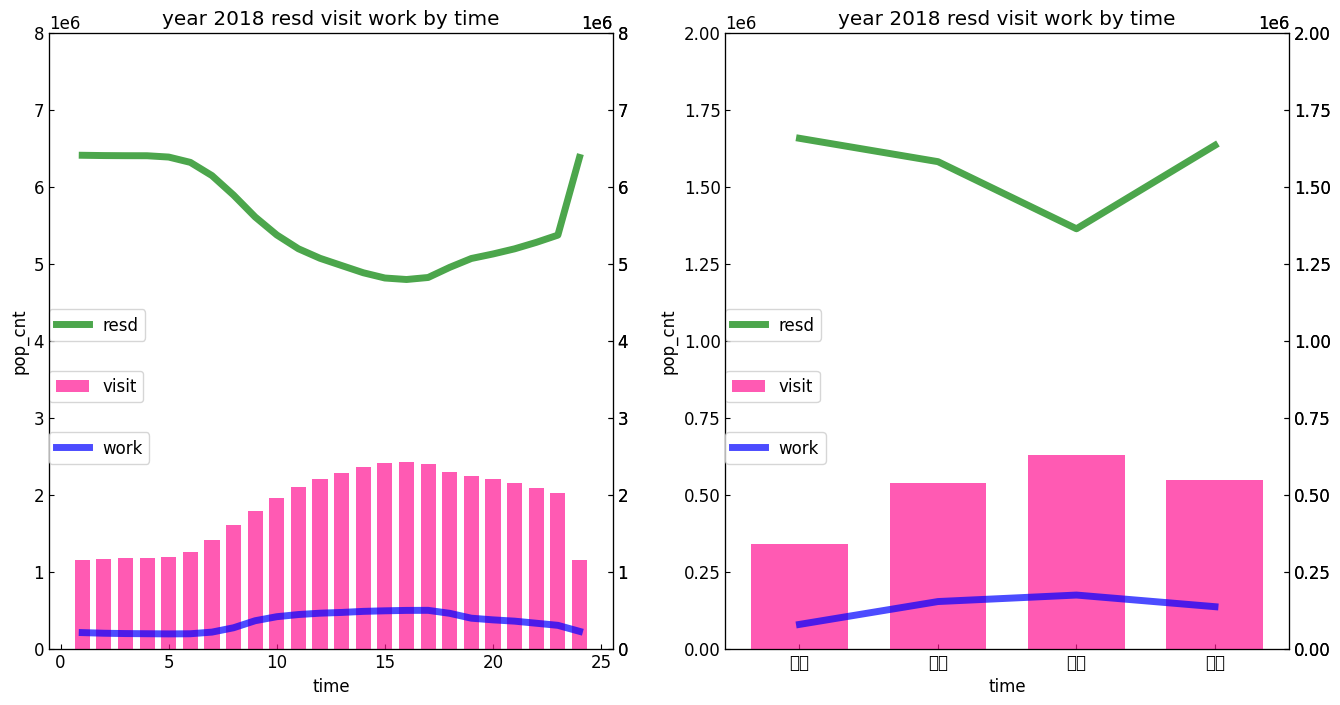

In [ ]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(1, 25)
y1 = np.array(test20['resd_pop_cnt'])
y2 = np.array(test20['visit_pop_cnt'])
y3 = np.array(test20['work_pop_cnt'])

x_2 = test20_2.index
y1_2 = np.array(test20_2['resd_pop_cnt'])
y2_2 = np.array(test20_2['visit_pop_cnt'])
y3_2 = np.array(test20_2['work_pop_cnt'])

# 3. 그래프 그리기
fig = plt.figure()
ax1 = plt.subplot(1,2,1)
ax4 = plt.subplot(1,2,2)

## 1) time 변수
ax1.plot(x, y1, color='green', markersize=7, linewidth=5, alpha=0.7, label='resd')
ax1.set_ylim(0, 8000000)
ax1.set_xlabel('time')
ax1.set_ylabel('pop_cnt')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='visit', alpha=0.7, width=0.7)
ax2.set_ylim(0, 8000000)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

ax3 = ax1.twinx()
ax3.plot(x, y3, color='blue', markersize=7, linewidth=5, alpha=0.7, label='work')
ax3.set_ylim(0, 8000000)
ax3.tick_params(axis='both', direction='in')

ax1.legend(loc=(0, 0.5), ncol=1)
ax2.legend(loc=(0, 0.4), ncol=1)
ax3.legend(loc=(0, 0.3), ncol=1)

plt.title('year 2018 resd visit work by time')

## 2)time_2 변수
ax4.plot(x_2, y1_2, color='green', markersize=7, linewidth=5, alpha=0.7, label='resd')
ax4.set_ylim(0, 2000000)
ax4.set_xlabel('time')
ax4.set_ylabel('pop_cnt')
ax4.tick_params(axis='both', direction='in')

ax5 = ax4.twinx()
ax5.bar(x_2, y2_2, color='deeppink', label='visit', alpha=0.7, width=0.7)
ax5.set_ylim(0, 2000000)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
ax5.tick_params(axis='y', direction='in')

ax6 = ax4.twinx()
ax6.plot(x_2, y3_2, color='blue', markersize=7, linewidth=5, alpha=0.7, label='work')
ax6.set_ylim(0, 2000000)
ax6.tick_params(axis='both', direction='in')

ax4.legend(loc=(0, 0.5), ncol=1)
ax5.legend(loc=(0, 0.4), ncol=1)
ax6.legend(loc=(0, 0.3), ncol=1)


plt.title('year 2020 resd visit work by time')
plt.show()

### (4) 2021년

In [ ]:
test21 = data1[data1['base_date'].dt.year==2021]
test21 = test21.groupby(['time']).sum()

In [ ]:
test21_2 = df1[df1['base_date'].dt.year==2021]
test21_2 = test21_2.groupby(['time_2']).sum()
test21_2

,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,week_date,weekend,year,month,day
time_2,,,,,,,,
새벽,895610.9540,40647.2205,173745.7799,6516,624,4389612,7620,33888
오전,842071.1072,85799.7122,294611.8984,6516,624,4389612,7620,33888
오후,707101.8923,97186.3719,344540.3010,6516,624,4389612,7620,33888
저녁,883324.1450,73577.3797,291110.1187,6516,624,4389612,7620,33888


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48317 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_

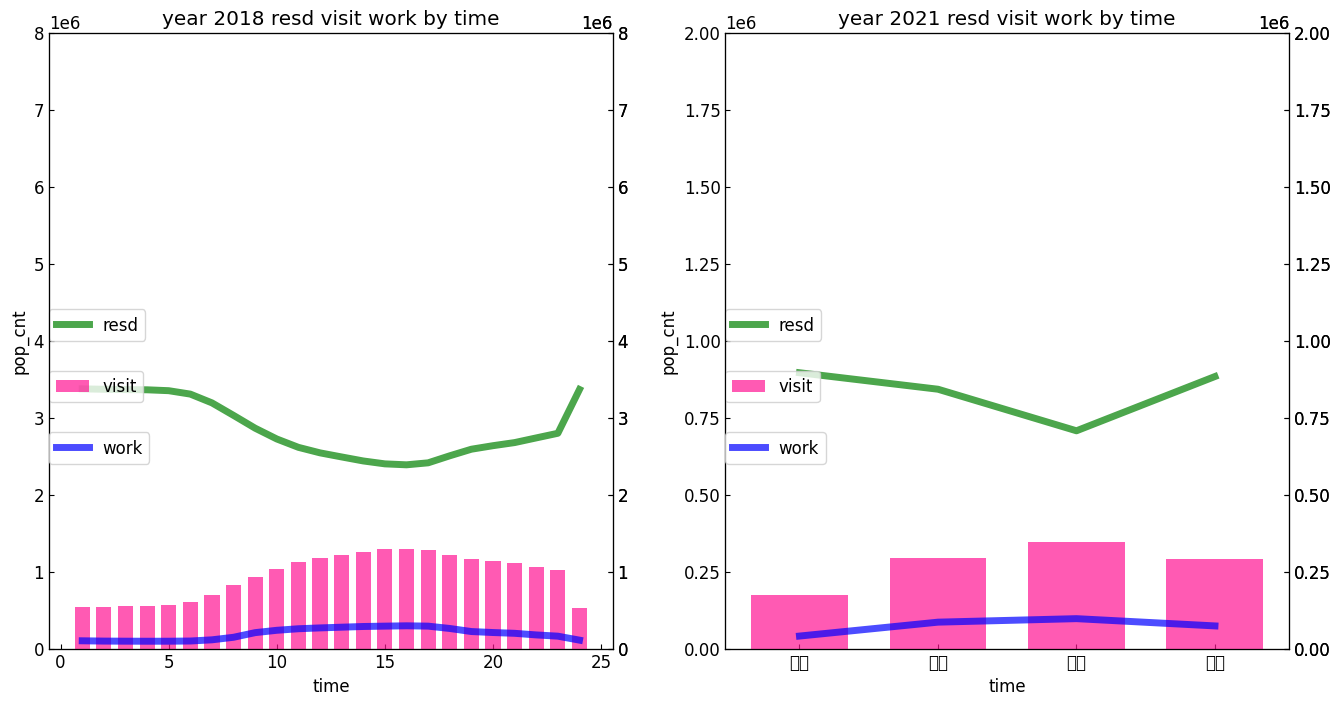

In [ ]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(1, 25)
y1 = np.array(test21['resd_pop_cnt'])
y2 = np.array(test21['visit_pop_cnt'])
y3 = np.array(test21['work_pop_cnt'])

x_2 = test21_2.index
y1_2 = np.array(test21_2['resd_pop_cnt'])
y2_2 = np.array(test21_2['visit_pop_cnt'])
y3_2 = np.array(test21_2['work_pop_cnt'])

# 3. 그래프 그리기
fig = plt.figure()
ax1 = plt.subplot(1,2,1)
ax4 = plt.subplot(1,2,2)

## 1) time 변수
ax1.plot(x, y1, color='green', markersize=7, linewidth=5, alpha=0.7, label='resd')
ax1.set_ylim(0, 8000000)
ax1.set_xlabel('time')
ax1.set_ylabel('pop_cnt')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='visit', alpha=0.7, width=0.7)
ax2.set_ylim(0, 8000000)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

ax3 = ax1.twinx()
ax3.plot(x, y3, color='blue', markersize=7, linewidth=5, alpha=0.7, label='work')
ax3.set_ylim(0, 8000000)
ax3.tick_params(axis='both', direction='in')

ax1.legend(loc=(0, 0.5), ncol=1)
ax2.legend(loc=(0, 0.4), ncol=1)
ax3.legend(loc=(0, 0.3), ncol=1)

plt.title('year 2018 resd visit work by time')

## 2)time_2 변수
ax4.plot(x_2, y1_2, color='green', markersize=7, linewidth=5, alpha=0.7, label='resd')
ax4.set_ylim(0, 2000000)
ax4.set_xlabel('time')
ax4.set_ylabel('pop_cnt')
ax4.tick_params(axis='both', direction='in')

ax5 = ax4.twinx()
ax5.bar(x_2, y2_2, color='deeppink', label='visit', alpha=0.7, width=0.7)
ax5.set_ylim(0, 2000000)
# ax2.set_ylabel(r'Demand ($\times10^6$)')
ax5.tick_params(axis='y', direction='in')

ax6 = ax4.twinx()
ax6.plot(x_2, y3_2, color='blue', markersize=7, linewidth=5, alpha=0.7, label='work')
ax6.set_ylim(0, 2000000)
ax6.tick_params(axis='both', direction='in')

ax4.legend(loc=(0, 0.5), ncol=1)
ax5.legend(loc=(0, 0.4), ncol=1)
ax6.legend(loc=(0, 0.3), ncol=1)


plt.title('year 2021 resd visit work by time')
plt.show()

## 2) 주말/비주말

### (3) 2020년

In [ ]:
week20_2 = df1[df1['base_date'].dt.year==2020]
week20_2 = week20_2.groupby(['location', 'days']).mean()

In [ ]:
week20_2 = week20_2.reset_index()
week20_2

,location,days,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,week_date,weekend,year,month,day
0,서귀포시 동,Friday,139.917100,11.371554,66.690656,4.0,False,2020.0,6.442308,15.942308
1,서귀포시 동,Monday,142.239678,11.409357,64.638422,0.0,False,2020.0,6.538462,16.000000
2,서귀포시 동,Saturday,140.445750,10.841446,69.665768,5.0,True,2020.0,6.480769,15.750000
3,서귀포시 동,Sunday,139.699885,10.976277,68.618754,6.0,True,2020.0,6.519231,15.596154
4,서귀포시 동,Thursday,141.166127,11.695032,64.221960,3.0,False,2020.0,6.528302,15.811321
5,서귀포시 동,Tuesday,142.335379,11.913531,66.268898,1.0,False,2020.0,6.576923,15.826923
6,서귀포시 동,Wednesday,141.799581,12.122245,67.164966,2.0,False,2020.0,6.509434,15.377358
7,서귀포시 서,Friday,398.483422,42.566301,121.910966,4.0,False,2020.0,6.442308,15.942308
8,서귀포시 서,Monday,404.197538,43.368601,120.945335,0.0,False,2020.0,6.538462,16.000000
9,서귀포시 서,Saturday,390.361365,33.941562,115.577750,5.0,True,2020.0,6.480769,15.750000


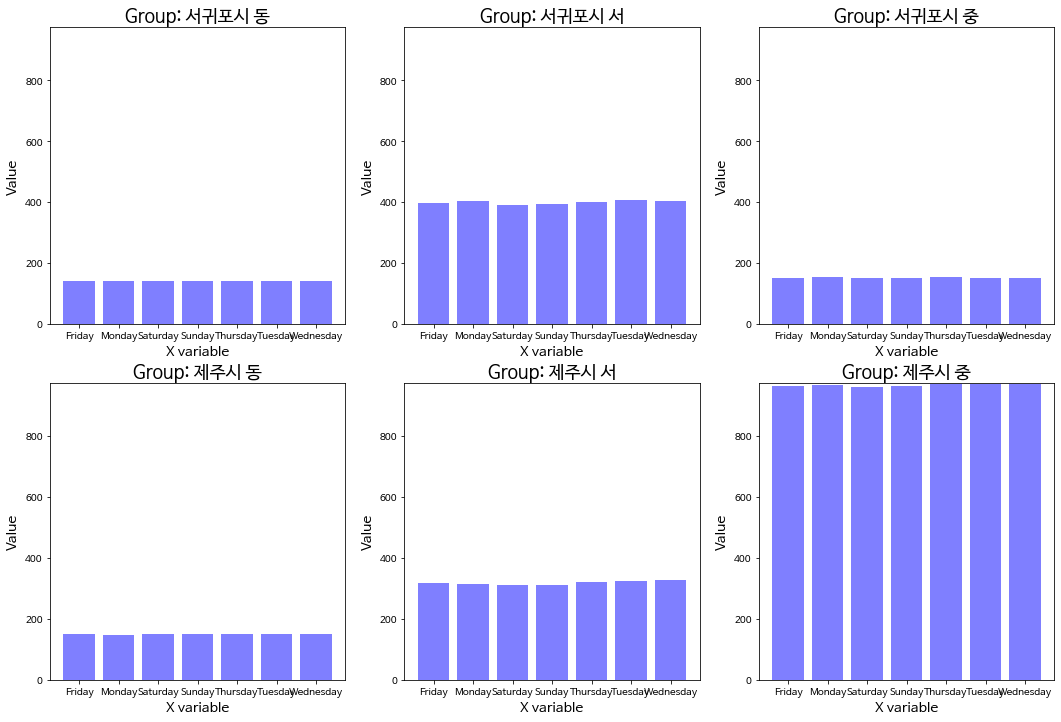

In [ ]:
# resd_pop_cnt
plt.rcParams['figure.figsize'] = [18, 12]

max_val = np.ceil(max(week20_2['resd_pop_cnt']))

for i, grp in enumerate(week20_2['location'].unique()):
    week20_2_i = week20_2[week20_2['location'] == grp]
    plt.subplot(2, 3, i+1)
    plt.bar(week20_2_i['days'], week20_2_i['resd_pop_cnt'], color='blue', alpha=0.5)
    plt.title('Group: %s' %grp, fontsize=18)
    plt.xlabel('X variable', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    # plt.xticks(fontsize=12)
    # plt.yticks(fontsize=12)
    # set fixed y axis scale
    plt.ylim(0, max_val)

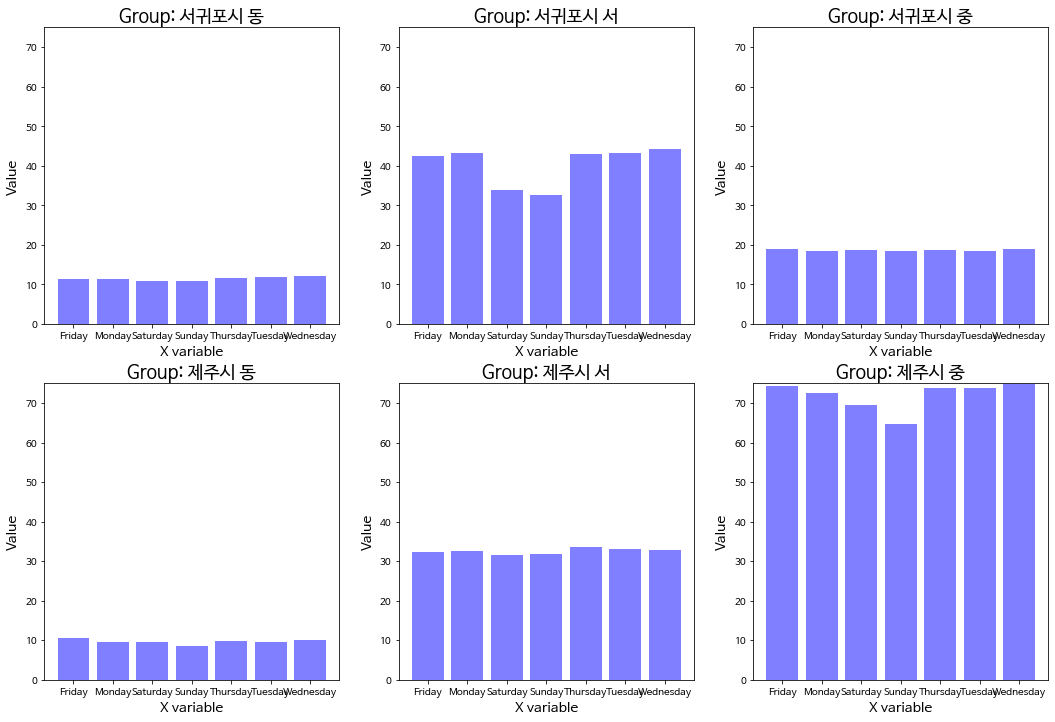

In [ ]:
# work_pop_cnt
plt.rcParams['figure.figsize'] = [18, 12]

max_val = np.ceil(max(week20_2['work_pop_cnt']))

for i, grp in enumerate(week20_2['location'].unique()):
    week20_2_i = week20_2[week20_2['location'] == grp]
    plt.subplot(2, 3, i+1)
    plt.bar(week20_2_i['days'], week20_2_i['work_pop_cnt'], color='blue', alpha=0.5)
    plt.title('Group: %s' %grp, fontsize=18)
    plt.xlabel('X variable', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    # plt.xticks(fontsize=12)
    # plt.yticks(fontsize=12)
    # set fixed y axis scale
    plt.ylim(0, max_val)

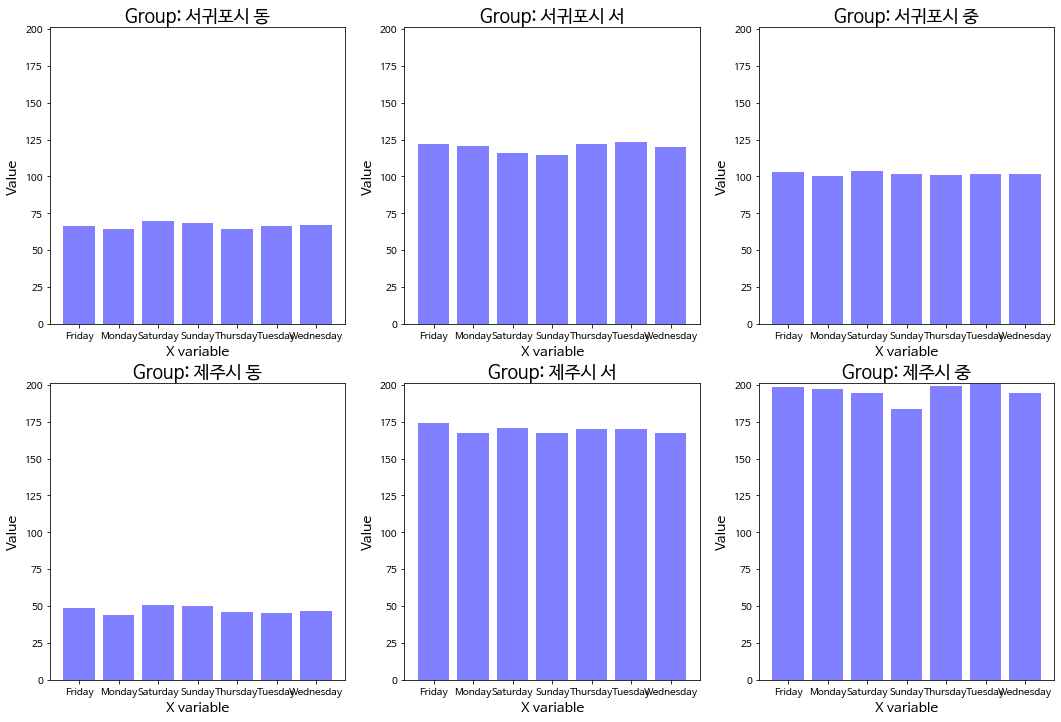

In [ ]:
# visit_pop_cnt
plt.rcParams['figure.figsize'] = [18, 12]

max_val = np.ceil(max(week20_2['visit_pop_cnt']))

for i, grp in enumerate(week20_2['location'].unique()):
    week20_2_i = week20_2[week20_2['location'] == grp]
    plt.subplot(2, 3, i+1)
    plt.bar(week20_2_i['days'], week20_2_i['visit_pop_cnt'], color='blue', alpha=0.5)
    plt.title('Group: %s' %grp, fontsize=18)
    plt.xlabel('X variable', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    # plt.xticks(fontsize=12)
    # plt.yticks(fontsize=12)
    # set fixed y axis scale
    plt.ylim(0, max_val)

### (4) 2021년

In [ ]:
week21_2 = df1[df1['base_date'].dt.year==2021]
week21_2 = week21_2.groupby(['location', 'days']).mean()

In [ ]:
week21_2 = week21_2.reset_index()
week21_2

,location,days,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,week_date,weekend,year,month,day
0,서귀포시 동,Friday,153.754092,10.606169,65.555998,4.0,False,2021.0,3.423077,15.653846
1,서귀포시 동,Monday,153.500862,10.718543,68.768434,0.0,False,2021.0,3.538462,15.230769
2,서귀포시 동,Saturday,155.812778,11.720338,69.632166,5.0,True,2021.0,3.461538,15.500000
3,서귀포시 동,Sunday,151.813925,11.177870,71.560740,6.0,True,2021.0,3.461538,16.500000
4,서귀포시 동,Thursday,152.696868,10.740846,68.661931,3.0,False,2021.0,3.520000,15.240000
5,서귀포시 동,Tuesday,152.495404,10.568768,69.080710,1.0,False,2021.0,3.576923,15.038462
6,서귀포시 동,Wednesday,151.528050,9.891194,72.957917,2.0,False,2021.0,3.576923,16.038462
7,서귀포시 서,Friday,392.998103,53.735838,135.697058,4.0,False,2021.0,3.423077,15.653846
8,서귀포시 서,Monday,390.741830,53.603957,135.741916,0.0,False,2021.0,3.538462,15.230769
9,서귀포시 서,Saturday,378.544726,42.445900,131.459197,5.0,True,2021.0,3.461538,15.500000


In [ ]:
week21_2['location'].unique()

array(['서귀포시 동', '서귀포시 서', '서귀포시 중', '제주시 동', '제주시 서', '제주시 중'],
      dtype=object)

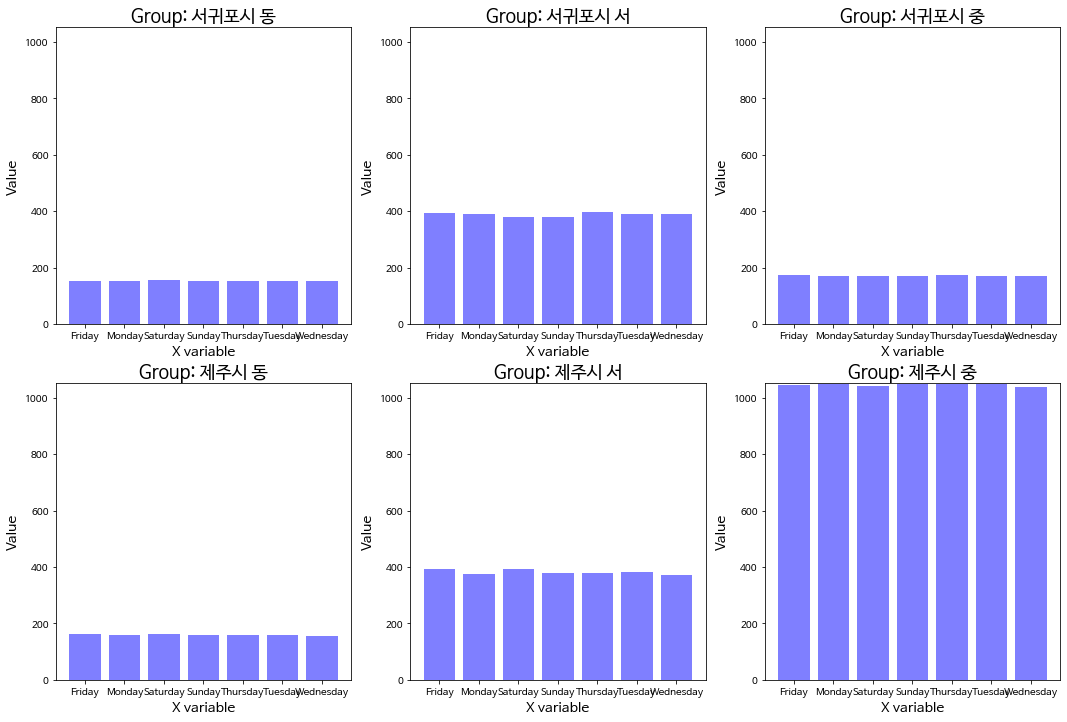

In [ ]:
plt.rcParams['figure.figsize'] = [18, 12]

max_val = np.ceil(max(week21_2['resd_pop_cnt']))

for i, grp in enumerate(week21_2['location'].unique()):
    week21_2_i = week21_2[week21_2['location'] == grp]
    plt.subplot(2, 3, i+1)
    plt.bar(week21_2_i['days'], week21_2_i['resd_pop_cnt'], color='blue', alpha=0.5)
    plt.title('Group: %s' %grp, fontsize=18)
    plt.xlabel('X variable', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    # plt.xticks(fontsize=12)
    # plt.yticks(fontsize=12)
    # set fixed y axis scale
    plt.ylim(0, max_val)